# DECISION TREE
## Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
## Tasks:
### 1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
### 2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
### 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
### 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
### 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
### 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
### Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?

### 1. Data Preparation:
###### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
import pandas as pd
df = pd.read_excel("heart_disease.xlsx", engine="openpyxl") 
df.head

<bound method NDFrame.head of      age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               th

In [2]:
data = pd.DataFrame(df)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


### 2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.

###### Performing exploratory data analysis to understand the structure of the dataset. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


###### checking for missing value

In [6]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,reversable defect,4


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

###### Visualizing the distribution of features, including histograms, box plots, and correlation matrices.

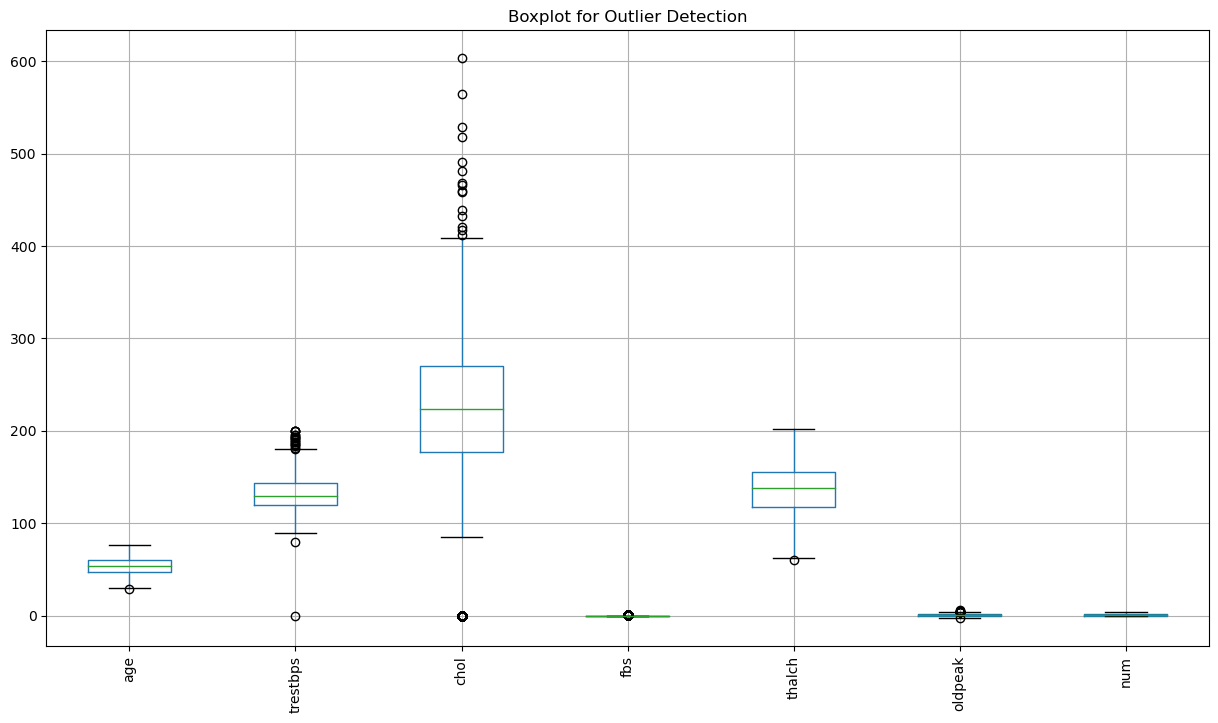

In [9]:
# Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

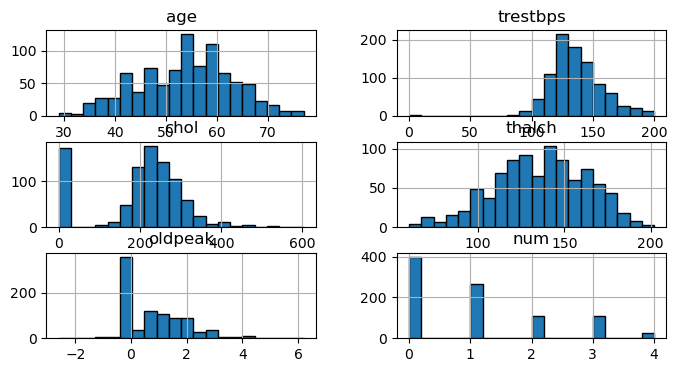

In [10]:
# Data visualization 
# Histogram of numerical features
df.hist(figsize=(8,4), bins=20, edgecolor='black')
plt.show()

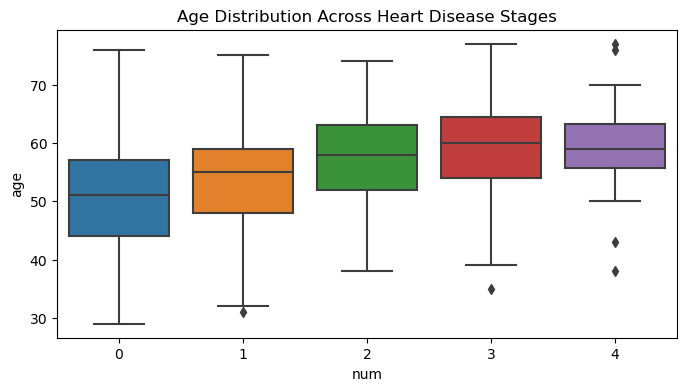

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['num'], y=df['age'])
plt.title("Age Distribution Across Heart Disease Stages")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13856\1950712524.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


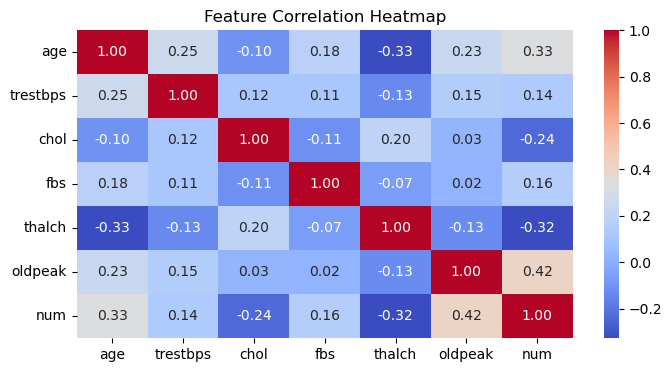

In [12]:
# Compute correlation matrix
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

###### performing scaling numerical features.

In [13]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Apply Standard Scaling
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_nums, columns=numerical_features)
data_scaled = pd.concat([df.drop(columns=numerical_features), scaled_df], axis=1)

print(data_scaled.head())
data = pd.DataFrame(data_scaled)
data


    sex               cp    fbs         restecg  exang        slope  \
0  Male   typical angina   True  lv hypertrophy  False  downsloping   
1  Male  atypical angina  False          normal  False         flat   
2  Male     asymptomatic  False          normal  False         flat   
3  Male   typical angina  False  lv hypertrophy  False         flat   
4  Male     asymptomatic  False          normal   True         flat   

           thal  num       age  trestbps      chol    thalch   oldpeak  
0  fixed defect    0  1.006027  0.567394  0.281297  0.524183  1.334996  
1  fixed defect    0 -1.397560  0.076967  0.013526 -0.147705 -0.844594  
2  fixed defect    0  0.350503  0.322181 -0.084656  0.449529 -0.465535  
3  fixed defect    0 -0.195767 -0.756760 -0.138211  2.017268 -0.844594  
4  fixed defect    0  0.350503 -1.149102 -0.004325 -0.371668  0.576878  


,sex,cp,fbs,restecg,exang,slope,thal,num,age,trestbps,chol,thalch,oldpeak
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect,0,1.006027,0.567394,0.281297,0.524183,1.334996e+00
1,Male,atypical angina,False,normal,False,flat,fixed defect,0,-1.397560,0.076967,0.013526,-0.147705,-8.445938e-01
2,Male,asymptomatic,False,normal,False,flat,fixed defect,0,0.350503,0.322181,-0.084656,0.449529,-4.655347e-01
3,Male,typical angina,False,lv hypertrophy,False,flat,fixed defect,0,-0.195767,-0.756760,-0.138211,2.017268,-8.445938e-01
4,Male,asymptomatic,False,normal,True,flat,fixed defect,0,0.350503,-1.149102,-0.004325,-0.371668,5.768777e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,Male,asymptomatic,False,normal,False,upsloping,fixed defect,4,-0.086513,-0.413461,-1.798388,-0.595631,5.768777e-01
904,Male,asymptomatic,False,st-t abnormality,True,flat,normal,4,0.896773,1.597292,-0.281021,-0.595631,1.998349e+00
905,Male,non-anginal,False,lv hypertrophy,True,downsloping,reversable defect,4,0.241249,1.793463,-1.798388,-0.483649,1.524525e+00
906,Male,non-anginal,True,st-t abnormality,TURE,downsloping,reversable defect,4,0.241249,0.518352,0.058155,-1.155538,-1.052100e-16


###### performing encoding categorical variables

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Convert boolean columns to string (if any)
data[categorical_features] = data[categorical_features].astype(str)

# Initialize OneHotEncoder with sparse_output=False
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated from sparse=False

# Applying OneHotEncoder
encoded_array = encoder.fit_transform(data[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_data = pd.DataFrame(encoded_array, columns=encoded_columns, index=data.index)  
data = pd.concat([data.drop(columns=categorical_features), encoded_data], axis=1)



In [15]:
df = pd.DataFrame(data)
df

,num,age,trestbps,chol,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_False,exang_TURE,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0,1.006027,0.567394,0.281297,0.524183,1.334996e+00,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-1.397560,0.076967,0.013526,-0.147705,-8.445938e-01,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0.350503,0.322181,-0.084656,0.449529,-4.655347e-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.195767,-0.756760,-0.138211,2.017268,-8.445938e-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.350503,-1.149102,-0.004325,-0.371668,5.768777e-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,4,-0.086513,-0.413461,-1.798388,-0.595631,5.768777e-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
904,4,0.896773,1.597292,-0.281021,-0.595631,1.998349e+00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
905,4,0.241249,1.793463,-1.798388,-0.483649,1.524525e+00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
906,4,0.241249,0.518352,0.058155,-1.155538,-1.052100e-16,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


###### performing handling missing values.

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
heart_data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
heart_data

,num,age,trestbps,chol,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_False,exang_TURE,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0.0,1.006027,0.567394,0.281297,0.524183,1.334996e+00,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-1.397560,0.076967,0.013526,-0.147705,-8.445938e-01,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.350503,0.322181,-0.084656,0.449529,-4.655347e-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,-0.195767,-0.756760,-0.138211,2.017268,-8.445938e-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.350503,-1.149102,-0.004325,-0.371668,5.768777e-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,4.0,-0.086513,-0.413461,-1.798388,-0.595631,5.768777e-01,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
904,4.0,0.896773,1.597292,-0.281021,-0.595631,1.998349e+00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
905,4.0,0.241249,1.793463,-1.798388,-0.483649,1.524525e+00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
906,4.0,0.241249,0.518352,0.058155,-1.155538,-1.052100e-16,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

###### Spliting the dataset into training and testing sets 

In [17]:
from sklearn.model_selection import train_test_split

X = heart_data.drop(columns=['num'])
y = heart_data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

###### Implementing a Decision Tree Classification model using a library like scikit-learn.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


heart_model = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=42)
heart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [19]:
model_train = heart_model.predict(X_train)

###### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [20]:
# Computing the confusion matrix and report
cm = confusion_matrix(y_train, model_train)
print(classification_report(y_train, model_train))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89       319
         1.0       0.81      0.78      0.79       212
         2.0       0.73      0.76      0.75        87
         3.0       0.85      0.60      0.71        86
         4.0       1.00      0.68      0.81        22

    accuracy                           0.83       726
   macro avg       0.85      0.75      0.79       726
weighted avg       0.83      0.83      0.82       726



In [21]:
cm

array([[302,   8,   7,   2,   0],
       [ 39, 165,   6,   2,   0],
       [  6,  10,  66,   5,   0],
       [  9,  17,   8,  52,   0],
       [  0,   4,   3,   0,  15]], dtype=int64)

### 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

###### Perform hyperparameter tuning to optimize the Decision Tree model. 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 8, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


###### Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Optimized Accuracy: {accuracy:.4f}")
print(f"Optimized Precision: {precision:.4f}")
print(f"Optimized Recall: {recall:.4f}")
print(f"Optimized F1-score: {f1:.4f}")


Optimized Accuracy: 0.5055
Optimized Precision: 0.4444
Optimized Recall: 0.5055
Optimized F1-score: 0.4727


C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features

###### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73        80
         1.0       0.37      0.42      0.39        53
         2.0       0.00      0.00      0.00        22
         3.0       0.29      0.38      0.33        21
         4.0       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.27      0.31      0.29       182
weighted avg       0.44      0.51      0.47       182



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###### Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [25]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(max_depth=3)  
model.fit(X_train, y_train)  


DecisionTreeClassifier(max_depth=3)

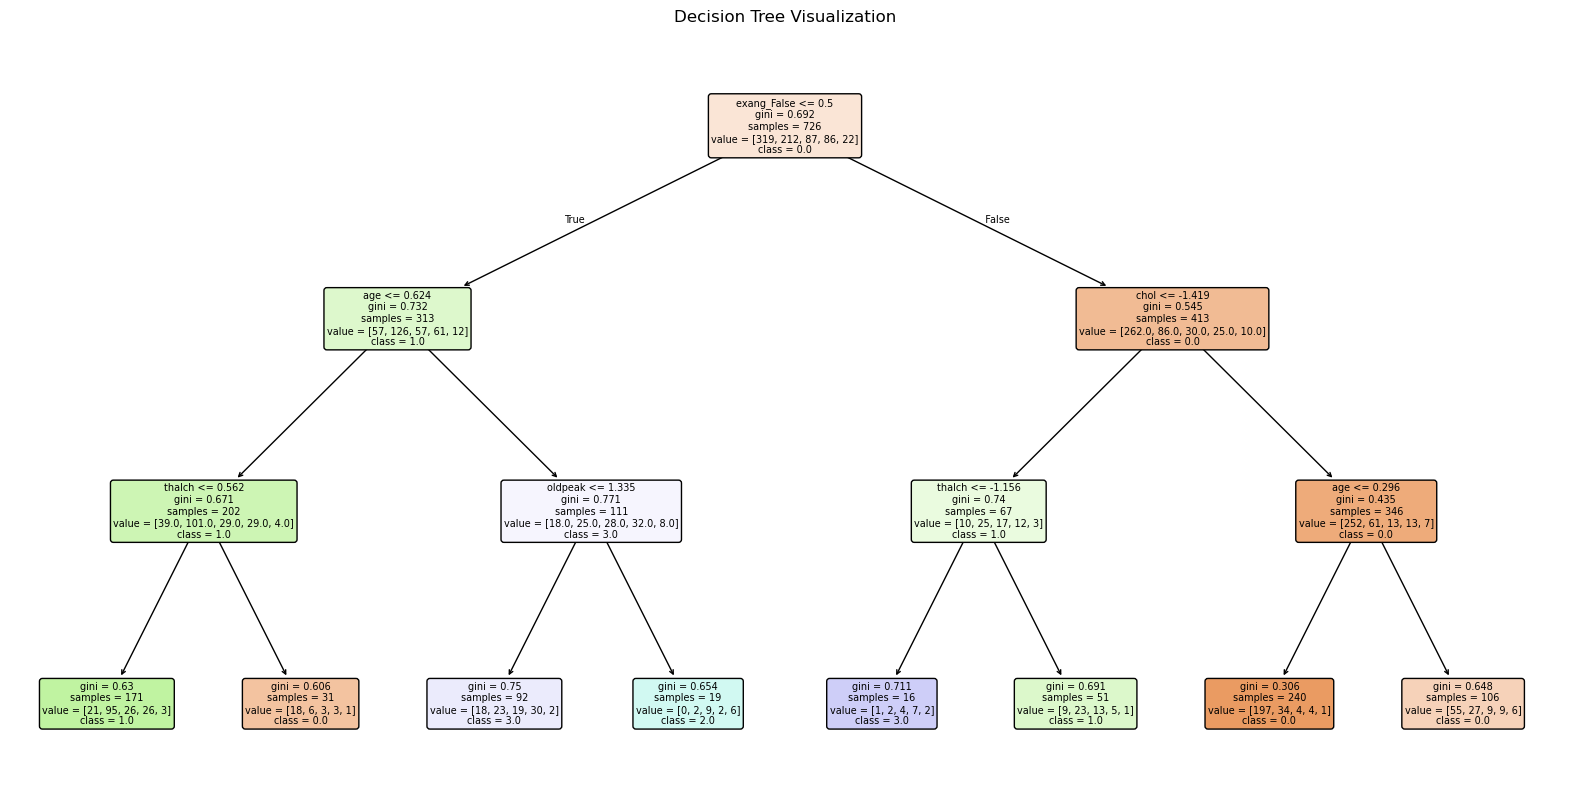

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

class_labels = [str(label) for label in model.classes_]  
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=class_labels, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


### Interview Questions:
###### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Common hyperparameters of decision trees include Max Depth, which controls tree depth to balance learning and overfitting, and Min Samples Split, which sets the minimum samples needed to split a node, preventing overfitting. Other key parameters are Min Samples Leaf for controlling leaf size, Max Features for limiting features per split, and Criterion i.e gini or entropy for measuring split quality.


###### 2. What is the difference between the Label encoding and One-hot encoding?
Label Encoding assigns a unique integer to each category, which may introduce unintended ordinal relationships. Where as One-Hot Encoding converts categories into binary vectors, avoiding ordinal issues but increasing dimensionality.